<a href="https://colab.research.google.com/github/akshayabhale1406/SCLR_Delhivery_FE/blob/main/Delhivery_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Case: Delhivery - Feature Engineering**

## Problem Statement : About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

 **Approach to understanding the problem and getting to insights**

First we will understand the data we have received, and then check what possible operation we can do to analyse the data better and observe patterns to provide solutions.

### Importing the relevant libraries

In [293]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Loading CSV as Dataset

In [294]:
df = pd.read_csv("/content/sample_data/delhivery_data.csv")



### Checking if the data is loaded as dataframe

In [295]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Checking the shape of the data

In [296]:
df.shape

(144867, 24)

### Checking column name

In [297]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

**OBSERVATION**: This data consists of 144867 checkpoints described across 24 columns.


### Checking data type of each column

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**OBSERVATION**: The time column should be of correct datatype, that is: datetime

### Convert the od_start_time and od_end_time to datetime data type

In [299]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

### Checking for missing vaules in column

In [301]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


**OBSERVATION**: There are missing values in  columns: source_name, destination_name, and segment factor. Since the missing values are less than 1% of the total data, we can directly drop the NULL values.



### Dropping the NULL values from the dataset

In [302]:
df = df.dropna(how ='any')

### Checking the shape of data after dropping NULL Values

In [303]:
df.shape

(144316, 24)

**OBSERVATION**: The new dataset is decreased by less than 1% of the actual raw dataset. This is acceptable for further Data Analysis.

In [304]:
df_null_check = df.isnull().sum()

### Checking to see if there are any NULL values in the new dataset.

In [305]:
df_null_check

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


**OBSERVATION**: No NULL values in the new dataset.

### Checking the statistical summary of raw data

In [306]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316,144316,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:09.454117120,2018-09-22 17:32:42.435769344,2018-09-23 09:36:54.057172224,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,2018-09-17 02:46:11.004421120,2018-09-17 07:37:35.014584832,2018-09-18 01:29:56.978912,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,2018-09-22 03:36:19.186585088,2018-09-22 07:35:23.038482944,2018-09-23 02:49:00.936600064,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,2018-09-27 17:53:19.027942912,2018-09-27 22:01:30.861209088,2018-09-28 12:13:41.675546112,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000
std,NaN,NaN,NaN,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804


### Checking if any orders are returned to source location.

In [307]:
returned_orders = df.groupby("trip_uuid").apply(lambda group: pd.DataFrame({"Returned_Packages": [any(group["source_center"] == group["destination_center"])]})).reset_index()
returned_orders.head()

<ipython-input-307-887a70d66ffd>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  returned_orders = df.groupby("trip_uuid").apply(lambda group: pd.DataFrame({"Returned_Packages": [any(group["source_center"] == group["destination_center"])]})).reset_index()


,trip_uuid,level_1,Returned_Packages
0,trip-153671041653548748,0,False
1,trip-153671042288605164,0,False
2,trip-153671043369099517,0,False
3,trip-153671046011330457,0,False
4,trip-153671052974046625,0,False


In [308]:
true_instances = returned_orders[returned_orders['Returned_Packages'] == True].index.tolist()
true_instances

[]

**OBSERVATION**: The below shows if any values are TRUE for Returned_Packages. Since the returned list is empty, it means no packages were returned.

### The current details are split for different trips as per different check-points for that trips. Data can be analysed better if the times of each check-points can be summed up for each trip ID.

In [309]:
df_combined_times = df.groupby("trip_uuid")[["segment_actual_time", "segment_osrm_time", "segment_osrm_distance"]].sum()
df_combined_times["segment_osrm_distance"] = np.round(df_combined_times["segment_osrm_distance"], 2)
df_combined_times = df_combined_times.rename(columns = {"segment_osrm_time" : "accumulated_osrm_time", "segment_actual_time" : "accumulated_actual_time", "segment_osrm_distance" : "accumulated_osrm_distance"})
df_combined_times.head()

,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance
trip_uuid,,,
trip-153671041653548748,1548.0,1008.0,1320.47
trip-153671042288605164,141.0,65.0,84.19
trip-153671043369099517,3308.0,1941.0,2545.27
trip-153671046011330457,59.0,16.0,19.88
trip-153671052974046625,340.0,115.0,146.79


In [310]:
df_combined_times_1 = df.groupby(["trip_uuid","destination_center"])[["actual_time", "osrm_time", "osrm_distance"]].last()
df_combined_times_1 = df_combined_times_1.reset_index()
df_combined_times_1 = df_combined_times_1.groupby("trip_uuid")[["actual_time", "osrm_time", "osrm_distance"]].sum()
df_combined_times_1.head()

,actual_time,osrm_time,osrm_distance
trip_uuid,,,
trip-153671041653548748,1562.0,717.0,991.3523
trip-153671042288605164,143.0,68.0,85.1110
trip-153671043369099517,3347.0,1740.0,2354.0665
trip-153671046011330457,59.0,15.0,19.6800
trip-153671052974046625,341.0,117.0,146.7918


### Calculation of time difference between OSRM time and Actual Time to know how much time error present present in the OSRM time calculation.

In [311]:
df_combined_times_1 = df_combined_times_1.reset_index()
df_combined_times = pd.merge(df_combined_times, df_combined_times_1, on = "trip_uuid")
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918


In [312]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [313]:
od_start_time = df.groupby('trip_uuid')['od_start_time'].first()
od_start_time = od_start_time.reset_index()
od_start_time = od_start_time.rename(columns={'od_start_time': 'trip_start_time'})
df_combined_times = df_combined_times.merge(od_start_time, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times["trip_start_date"] = df_combined_times["trip_start_time"].dt.date
trip_start_location = df.groupby('trip_uuid')['source_name'].first()
trip_end_location = df.groupby('trip_uuid')['destination_name'].last()
trip_end_location = trip_end_location.reset_index()
trip_start_location = trip_start_location.reset_index()
df_combined_times = df_combined_times.merge(trip_start_location, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times = df_combined_times.merge(trip_end_location, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times = df_combined_times.drop(columns=['trip_start_time'])
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523,2018-09-12,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana)
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110,2018-09-12,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka)
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665,2018-09-12,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab)
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800,2018-09-12,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra)
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918,2018-09-12,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka)


In [314]:
od_start_time = df.groupby('trip_uuid')['od_start_time'].first()
od_start_time = od_start_time.reset_index()
od_start_time = od_start_time.rename(columns={'od_start_time': 'trip_start_time'})
df_combined_times = df_combined_times.merge(od_start_time, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523,2018-09-12,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110,2018-09-12,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665,2018-09-12,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800,2018-09-12,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918,2018-09-12,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725


### Creating a column for Starting Point and Ending Point of a trip using States names

In [315]:
df_combined_times["source_name"] = df_combined_times["source_name"].str.split("(").str[1]
df_combined_times["source_name"] = df_combined_times["source_name"].str.split(")").str[0]
df_combined_times["source_name"] = df_combined_times["source_name"].apply(lambda x : x.upper())
df_combined_times["destination_name"] = df_combined_times["destination_name"].str.split("(").str[1]
df_combined_times["destination_name"] = df_combined_times["destination_name"].str.split(")").str[0]
df_combined_times["destination_name"] = df_combined_times["destination_name"].apply(lambda x : x.upper())
df_combined_times

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523,2018-09-12,MADHYA PRADESH,HARYANA,2018-09-12 00:00:16.535741
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:00:22.886430
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665,2018-09-12,KARNATAKA,PUNJAB,2018-09-12 00:00:33.691250
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800,2018-09-12,MAHARASHTRA,MAHARASHTRA,2018-09-12 00:01:00.113710
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:02:09.740725
...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,82.0,62.0,64.86,83.0,62.0,73.4630,2018-10-03,PUNJAB,PUNJAB,2018-10-03 23:55:56.258533
14783,trip-153861104386292051,21.0,11.0,16.09,21.0,12.0,16.0882,2018-10-03,HARYANA,HARYANA,2018-10-03 23:57:23.863155
14784,trip-153861106442901555,281.0,88.0,104.89,282.0,48.0,58.9037,2018-10-03,UTTAR PRADESH,UTTAR PRADESH,2018-10-03 23:57:44.429324
14785,trip-153861115439069069,258.0,221.0,223.53,264.0,179.0,171.1103,2018-10-03,TAMIL NADU,TAMIL NADU,2018-10-03 23:59:14.390954


In [316]:
od_start = df.groupby('trip_uuid')['od_start_time'].first()
od_end = df.groupby('trip_uuid')['od_end_time'].last()
df_combined_times = df_combined_times.set_index('trip_uuid').merge(od_start, left_index=True, right_index=True).reset_index()
df_combined_times = df_combined_times.set_index('trip_uuid').merge(od_end, left_index=True, right_index=True).reset_index()
df_combined_times["trip_duration"] = (df_combined_times["od_end_time"] - df_combined_times["od_start_time"]).dt.total_seconds()/60
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time,od_start_time,od_end_time,trip_duration
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523,2018-09-12,MADHYA PRADESH,HARYANA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2260.109800
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,181.611874
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665,2018-09-12,KARNATAKA,PUNJAB,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3934.362520
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800,2018-09-12,MAHARASHTRA,MAHARASHTRA,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.494935
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,718.349042


In [317]:
df_start_t_to_end_t = df.groupby("trip_uuid")["start_scan_to_end_scan"].last()
df_start_t_to_end_t = df_start_t_to_end_t.reset_index()
df_combined_times = df_combined_times.merge(df_start_t_to_end_t, on = "trip_uuid")
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time,od_start_time,od_end_time,trip_duration,start_scan_to_end_scan
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523,2018-09-12,MADHYA PRADESH,HARYANA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2260.109800,1260.0
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,181.611874,58.0
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665,2018-09-12,KARNATAKA,PUNJAB,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3934.362520,834.0
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800,2018-09-12,MAHARASHTRA,MAHARASHTRA,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.494935,100.0
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,718.349042,485.0


In [318]:
df_combined_times = df_combined_times.loc[:, ['trip_uuid', 'source_name', 'trip_start_date', 'destination_name', 'od_end_time', 'trip_duration', 'start_scan_to_end_scan', 'actual_time', 'accumulated_actual_time', 'osrm_time', 'accumulated_osrm_time', 'osrm_distance', 'accumulated_osrm_distance']]
df_combined_times["od_end_time"] = df_combined_times["od_end_time"].dt.date
df_combined_times = df_combined_times.rename(columns = {"od_end_time" : "trip_end_date"})
df_combined_times.head()

,trip_uuid,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,trip-153671041653548748,MADHYA PRADESH,2018-09-12,HARYANA,2018-09-13,2260.109800,1260.0,1562.0,1548.0,717.0,1008.0,991.3523,1320.47
1,trip-153671042288605164,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,181.611874,58.0,143.0,141.0,68.0,65.0,85.1110,84.19
2,trip-153671043369099517,KARNATAKA,2018-09-12,PUNJAB,2018-09-14,3934.362520,834.0,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.27
3,trip-153671046011330457,MAHARASHTRA,2018-09-12,MAHARASHTRA,2018-09-12,100.494935,100.0,59.0,59.0,15.0,16.0,19.6800,19.88
4,trip-153671052974046625,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,718.349042,485.0,341.0,340.0,117.0,115.0,146.7918,146.79


In [319]:
most_busy_days = df_combined_times['trip_start_date'].value_counts().sort_index()
most_busy_days

,count
trip_start_date,
2018-09-12,696
2018-09-13,735
2018-09-14,697
2018-09-15,818
2018-09-16,604
2018-09-17,716
2018-09-18,792
2018-09-19,669
2018-09-20,708


[Text(0.5, 0, 'Number of trips'),
 Text(0, 0.5, 'Trip Date'),
 Text(0.5, 1.0, 'Plot of Number of Trip v/s Trip Date')]

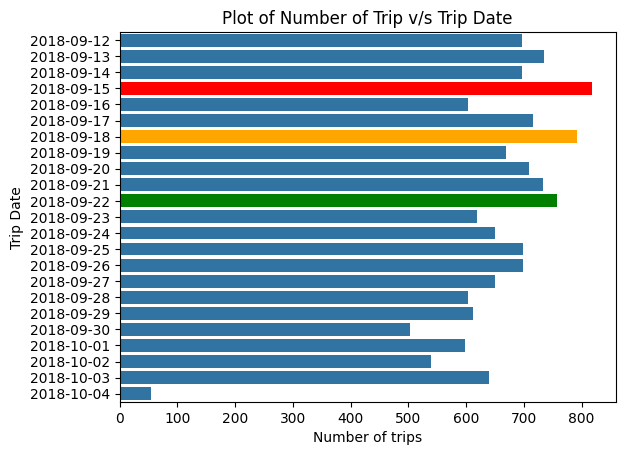

In [320]:
most_busy_days = df_combined_times['trip_start_date'].value_counts().sort_index().reset_index()
most_busy_day = sns.barplot(data = most_busy_days, x = "count", y = "trip_start_date")
bars = most_busy_day.patches
bars[3].set_facecolor("red")
bars[6].set_facecolor("orange")
bars[10].set_facecolor("green")
most_busy_day.set(xlabel ="Number of trips", ylabel = "Trip Date", title ='Plot of Number of Trip v/s Trip Date')

In [321]:
df_top_10_center = df["source_center"].value_counts().head(13)

df_top_10_destination_center = df["destination_center"].value_counts().head(13)

df_most_busy_center = df_top_10_center.reset_index().merge(df_top_10_destination_center.reset_index(), left_on="source_center", right_on="destination_center")

df_most_busy_center = df_most_busy_center.rename(columns={"source_center": "Center_Code"})

df_most_busy_center = df_most_busy_center.drop(columns=["destination_center"])

df_most_busy_center = df_most_busy_center.rename(columns = {"count_x" : "source_center", "count_y" : "destination_center"})

df_most_busy_center

,Center_Code,source_center,destination_center
0,IND000000ACB,23267,15192
1,IND562132AAA,9975,11019
2,IND421302AAG,9088,5492
3,IND411033AAA,4061,3695
4,IND501359AAE,3340,5142
5,IND712311AAA,2612,4892
6,IND160002AAC,2450,2874
7,IND110037AAM,1997,3761
8,IND131028AAB,1681,2796
9,IND600056AAB,1678,2096


<Axes: xlabel='Center_Code'>

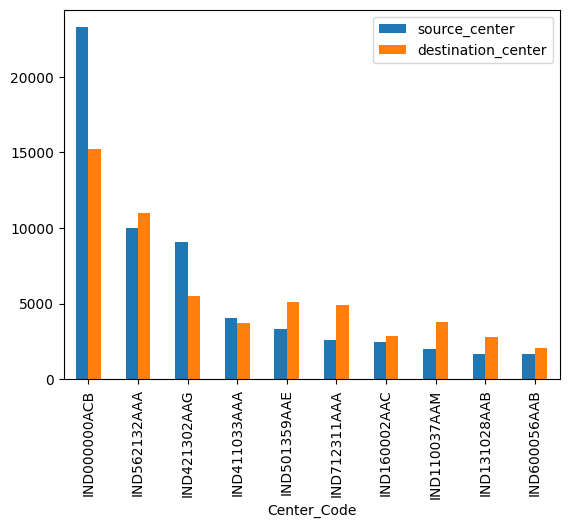

In [322]:
df_most_busy_center.plot(x = "Center_Code", y=["source_center", "destination_center"], kind="bar")

In [323]:
df_top_10_city = df_combined_times["source_name"].value_counts().head(10)

df_top_10_destination_name = df_combined_times["destination_name"].value_counts().head(10)

df_most_busy_city = df_top_10_city.reset_index().merge(df_top_10_destination_name.reset_index(), left_on="source_name", right_on="destination_name")

df_most_busy_city = df_most_busy_city.rename(columns={"source_name": "city_name"})

df_most_busy_city = df_most_busy_city.drop(columns=["destination_name"])

df_most_busy_city = df_most_busy_city.rename(columns = {"count_x" : "from_city", "count_y" : "to_city"})

df_most_busy_city

,city_name,from_city,to_city
0,MAHARASHTRA,2682,2591
1,KARNATAKA,2229,2276
2,HARYANA,1669,1664
3,TAMIL NADU,1085,1072
4,DELHI,790,674
5,TELANGANA,779,843
6,GUJARAT,746,746
7,UTTAR PRADESH,719,731
8,WEST BENGAL,677,708
9,PUNJAB,630,693


<Axes: xlabel='city_name'>

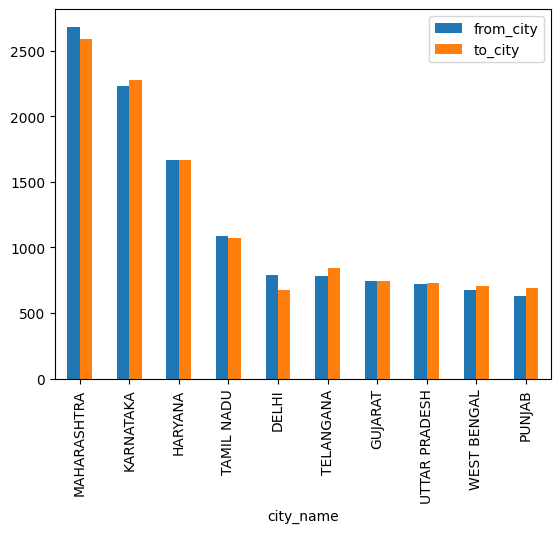

In [324]:
df_most_busy_city.plot(x = "city_name", y=["from_city", "to_city"], kind="bar")

In [325]:
df_bottom_10_city = df_combined_times["source_name"].value_counts().tail(13)

df_bottom_10_destination_name = df_combined_times["destination_name"].value_counts().tail(13)

df_least_busy_city = df_bottom_10_city.reset_index().merge(df_bottom_10_destination_name.reset_index(), left_on="source_name", right_on="destination_name")

df_least_busy_city = df_least_busy_city.rename(columns={"source_name": "city_name"})

df_least_busy_city = df_least_busy_city.drop(columns=["destination_name"])

df_least_busy_city = df_least_busy_city.rename(columns = {"count_x" : "from_city", "count_y" : "to_city"})

df_least_busy_city

,city_name,from_city,to_city
0,GOA,65,65
1,CHANDIGARH,48,29
2,CHHATTISGARH,43,43
3,HIMACHAL PRADESH,34,40
4,JAMMU & KASHMIR,17,15
5,DADRA AND NAGAR HAVELI,15,17
6,PONDICHERRY,12,10
7,NAGALAND,5,1
8,ARUNACHAL PRADESH,4,23
9,MIZORAM,4,6


<Axes: xlabel='city_name'>

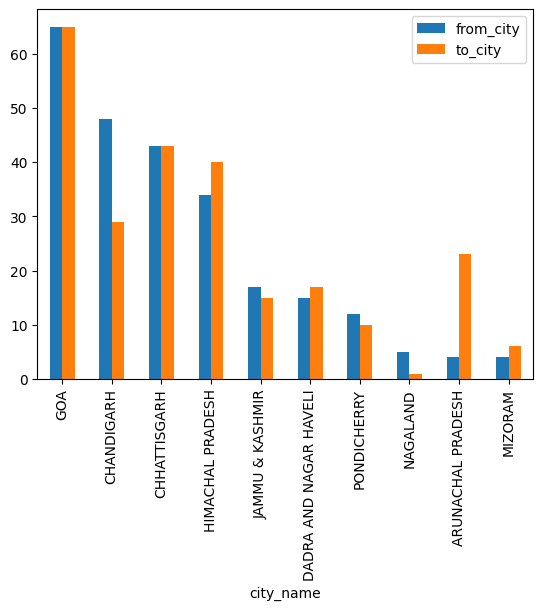

In [326]:
df_least_busy_city.plot(x = "city_name", y=["from_city", "to_city"], kind="bar")

## HYPOTHESIS TESTING:

1) Testing if the difference trip_duration and start_scan_to_end_scan is significant using **TWO SAMPLE T-TEST**

In [327]:
df_combined_times.head()

,trip_uuid,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,trip-153671041653548748,MADHYA PRADESH,2018-09-12,HARYANA,2018-09-13,2260.109800,1260.0,1562.0,1548.0,717.0,1008.0,991.3523,1320.47
1,trip-153671042288605164,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,181.611874,58.0,143.0,141.0,68.0,65.0,85.1110,84.19
2,trip-153671043369099517,KARNATAKA,2018-09-12,PUNJAB,2018-09-14,3934.362520,834.0,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.27
3,trip-153671046011330457,MAHARASHTRA,2018-09-12,MAHARASHTRA,2018-09-12,100.494935,100.0,59.0,59.0,15.0,16.0,19.6800,19.88
4,trip-153671052974046625,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,718.349042,485.0,341.0,340.0,117.0,115.0,146.7918,146.79


In [328]:
df_hypo_test1 = df_combined_times.copy()
df_hypo_test1["diff_trip_duration_scan"] = df_hypo_test1["trip_duration"] - df_hypo_test1["start_scan_to_end_scan"]
df_hypo_test1.head()

,trip_uuid,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
0,trip-153671041653548748,MADHYA PRADESH,2018-09-12,HARYANA,2018-09-13,2260.109800,1260.0,1562.0,1548.0,717.0,1008.0,991.3523,1320.47,1000.109800
1,trip-153671042288605164,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,181.611874,58.0,143.0,141.0,68.0,65.0,85.1110,84.19,123.611874
2,trip-153671043369099517,KARNATAKA,2018-09-12,PUNJAB,2018-09-14,3934.362520,834.0,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.27,3100.362520
3,trip-153671046011330457,MAHARASHTRA,2018-09-12,MAHARASHTRA,2018-09-12,100.494935,100.0,59.0,59.0,15.0,16.0,19.6800,19.88,0.494935
4,trip-153671052974046625,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,718.349042,485.0,341.0,340.0,117.0,115.0,146.7918,146.79,233.349042


In [329]:
df_hypo_test1.describe()

,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,546.138228,365.294718,355.778927,353.059174,160.739839,180.511598,203.581339,222.705471,180.843510
std,668.196017,509.174347,561.043587,556.365911,271.248764,314.679279,370.275648,416.846283,366.664515
min,23.461468,20.000000,9.000000,9.000000,6.000000,6.000000,9.072900,9.070000,0.000240
25%,150.931553,112.000000,67.000000,66.000000,29.000000,30.000000,30.753000,32.580000,0.413471
50%,287.421234,193.000000,148.000000,147.000000,60.000000,65.000000,65.269400,69.780000,0.830173
75%,670.642993,387.000000,367.000000,364.000000,168.000000,184.000000,206.108050,216.560000,237.291050
max,7898.551955,7898.000000,6265.000000,6230.000000,2032.000000,2564.000000,2840.081000,3523.630000,3575.097420


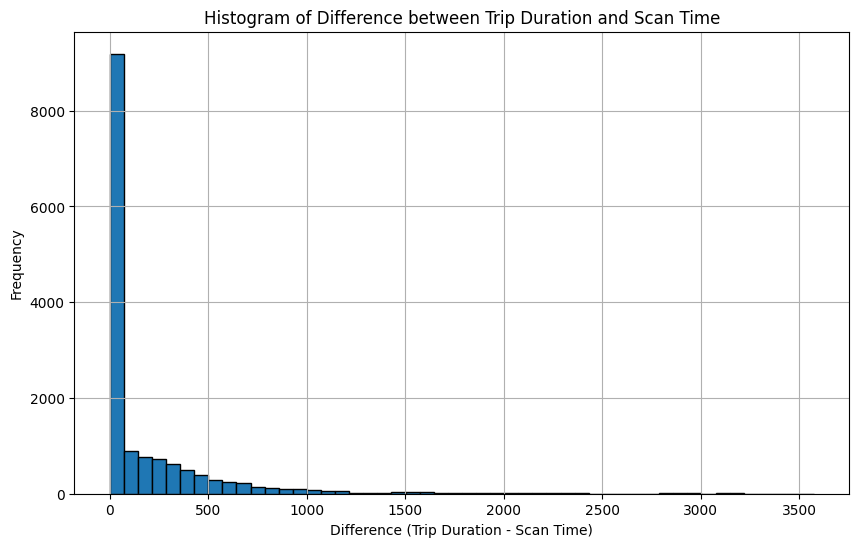

In [330]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_hypo_test1["diff_trip_duration_scan"], bins=50, edgecolor='black')
plt.xlabel("Difference (Trip Duration - Scan Time)")
plt.ylabel("Frequency")
plt.title("Histogram of Difference between Trip Duration and Scan Time")
plt.grid(True)
plt.show()

In [331]:
def remove_outliers_iqr_df(df_data, column_name):

  q1 = df_data[column_name].quantile(0.25)
  q3 = df_data[column_name].quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  return df_data[(df_data[column_name] >= lower_bound) & (df_data[column_name] <= upper_bound)]

data_without_outliers = remove_outliers_iqr_df(df_hypo_test1, 'start_scan_to_end_scan')

In [332]:
def remove_outliers_iqr_df1(df_data1, column_name1):

  q1 = df_data1[column_name].quantile(0.25)
  q3 = df_data1[column_name].quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  return df_data1[(df_data1[column_name] >= lower_bound) & (df_data1[column_name] <= upper_bound)]

data_without_outliers1 = remove_outliers_iqr_df(data_without_outliers, 'trip_duration')

In [333]:
data_without_outliers1.describe()

,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
count,12321.000000,12321.000000,12321.000000,12321.000000,12321.000000,12321.000000,12321.000000,12321.000000,12321.000000
mean,306.498301,209.093174,171.085870,169.631605,77.133431,85.169873,90.048891,96.806024,97.405127
std,229.794716,149.975980,155.098917,154.054199,75.253954,84.431470,92.896088,99.912021,170.293932
min,23.461468,20.000000,9.000000,9.000000,7.000000,7.000000,9.072900,9.070000,0.000240
25%,135.320254,102.000000,60.000000,59.000000,26.000000,27.000000,27.909400,29.080000,0.381360
50%,230.730192,164.000000,110.000000,108.000000,48.000000,52.000000,46.502100,52.510000,0.761007
75%,409.860942,269.000000,236.000000,235.000000,103.000000,118.000000,125.875800,134.610000,145.756223
max,1030.854552,799.000000,911.000000,905.000000,555.000000,681.000000,683.476500,672.200000,905.323654


In [334]:
from scipy import stats
t_statistic, p_value = stats.ttest_rel(df_hypo_test1["trip_duration"], df_hypo_test1["start_scan_to_end_scan"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of trip_duration and start_scan_to_end_scan.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means of trip_duration and start_scan_to_end_scan.")

t-statistic: 59.97552816909605
p-value: 0.0
Reject the null hypothesis. There is a significant difference between the means of trip_duration and start_scan_to_end_scan.


In [335]:
data_without_outliers1

,trip_uuid,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
1,trip-153671042288605164,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,181.611874,58.0,143.0,141.0,68.0,65.0,85.1110,84.19,123.611874
3,trip-153671046011330457,MAHARASHTRA,2018-09-12,MAHARASHTRA,2018-09-12,100.494935,100.0,59.0,59.0,15.0,16.0,19.6800,19.88,0.494935
4,trip-153671052974046625,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,718.349042,485.0,341.0,340.0,117.0,115.0,146.7918,146.79,233.349042
5,trip-153671055416136166,TAMIL NADU,2018-09-12,TAMIL NADU,2018-09-12,190.487849,60.0,61.0,60.0,23.0,23.0,28.0647,28.06,130.487849
6,trip-153671066201138152,TAMIL NADU,2018-09-12,TAMIL NADU,2018-09-12,98.005634,98.0,24.0,24.0,13.0,13.0,12.0184,12.02,0.005634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,PUNJAB,2018-10-03,PUNJAB,2018-10-04,405.485842,105.0,83.0,82.0,62.0,62.0,73.4630,64.86,300.485842
14783,trip-153861104386292051,HARYANA,2018-10-03,HARYANA,2018-10-04,60.590521,60.0,21.0,21.0,12.0,11.0,16.0882,16.09,0.590521
14784,trip-153861106442901555,UTTAR PRADESH,2018-10-03,UTTAR PRADESH,2018-10-04,422.119867,248.0,282.0,281.0,48.0,88.0,58.9037,104.89,174.119867
14785,trip-153861115439069069,TAMIL NADU,2018-10-03,TAMIL NADU,2018-10-04,348.512862,91.0,264.0,258.0,179.0,221.0,171.1103,223.53,257.512862


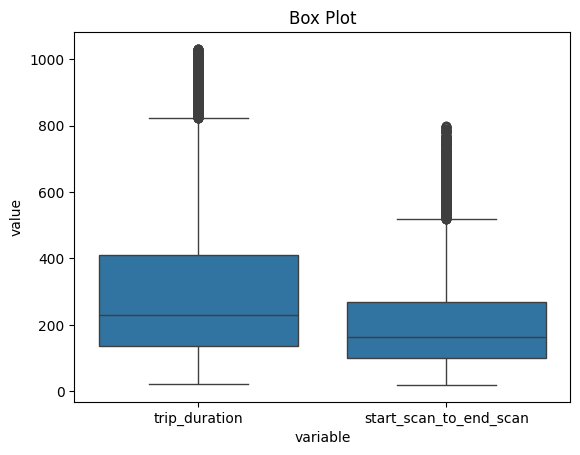

In [336]:
df_melted = pd.melt(data_without_outliers1.reset_index(), id_vars=['trip_uuid'], value_vars=['trip_duration', 'start_scan_to_end_scan'])
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Box Plot')
plt.show()

actual_time aggregated value and OSRM time aggregated value


In [337]:
df_act_osrm_test = df.groupby(["trip_uuid", "destination_center"] )[["actual_time", "osrm_time"]].last()
df_act_osrm_test = df_act_osrm_test.reset_index()
df_act_osrm_test = df_act_osrm_test.groupby("trip_uuid")[["actual_time", "osrm_time"]].sum()
df_act_osrm_test

,actual_time,osrm_time
trip_uuid,,
trip-153671041653548748,1562.0,717.0
trip-153671042288605164,143.0,68.0
trip-153671043369099517,3347.0,1740.0
trip-153671046011330457,59.0,15.0
trip-153671052974046625,341.0,117.0
...,...,...
trip-153861095625827784,83.0,62.0
trip-153861104386292051,21.0,12.0
trip-153861106442901555,282.0,48.0


In [338]:
df_act_osrm_test.describe()

,actual_time,osrm_time
count,14787.000000,14787.000000
mean,355.778927,160.739839
std,561.043587,271.248764
min,9.000000,6.000000
25%,67.000000,29.000000
50%,148.000000,60.000000
75%,367.000000,168.000000
max,6265.000000,2032.000000


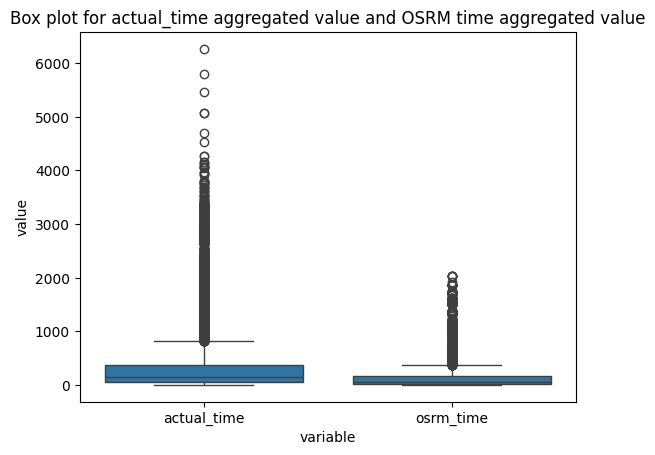

In [339]:
df_melted_1 = pd.melt(df_act_osrm_test.reset_index(), id_vars = ["trip_uuid"], value_vars = ["actual_time", "osrm_time"])

sns.boxplot(x = "variable", y = "value", data = df_melted_1)

plt.title("Box plot for actual_time aggregated value and OSRM time aggregated value")
plt.show()

In [340]:
def remove_outliers_iqr_df_act_osrm_test(df_act, act_t, osrm_t):

  q1 = df_act[act_t].quantile(0.25)
  q3 = df_act[act_t].quantile(0.75)
  iqr1 = q3 - q1

  lower_bound1 = q1 - 1.5 * iqr1
  upper_bound2 = q3 + 1.5 * iqr1

  q2 = df_act[osrm_t].quantile(0.25)
  q4 = df_act[osrm_t].quantile(0.75)
  iqr2 = q4 - q2

  lower_bound3 = q2 - 1.5 * iqr2
  upper_bound4 = q4 + 1.5 * iqr2

  return df_act[((df_act[act_t] >= lower_bound1) & (df_act[act_t] <= upper_bound2) & (df_act[osrm_t] >= lower_bound3) & (df_act[osrm_t] <= upper_bound4))]

df_act_osrm_test_wo_outliers = remove_outliers_iqr_df_act_osrm_test(df_act_osrm_test, 'actual_time', 'osrm_time')

In [341]:
df_act_osrm_test_wo_outliers

,actual_time,osrm_time
trip_uuid,,
trip-153671042288605164,143.0,68.0
trip-153671046011330457,59.0,15.0
trip-153671052974046625,341.0,117.0
trip-153671055416136166,61.0,23.0
trip-153671066201138152,24.0,13.0
...,...,...
trip-153861095625827784,83.0,62.0
trip-153861104386292051,21.0,12.0
trip-153861106442901555,282.0,48.0


In [342]:
df_act_osrm_test_wo_outliers.describe()

,actual_time,osrm_time
count,12927.000000,12927.000000
mean,183.823857,81.456951
std,166.767786,76.743655
min,9.000000,6.000000
25%,62.000000,27.000000
50%,117.000000,50.000000
75%,260.000000,114.000000
max,815.000000,376.000000


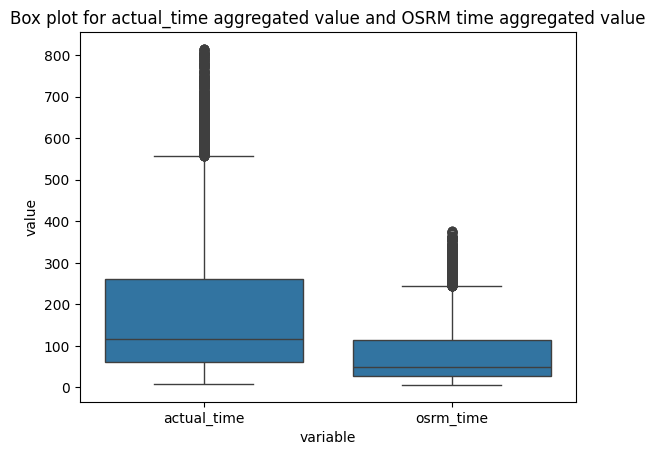

In [343]:
df_melted_2 = pd.melt(df_act_osrm_test_wo_outliers.reset_index(), id_vars = ["trip_uuid"], value_vars = ["actual_time", "osrm_time"])

sns.boxplot(x = "variable", y = "value", data = df_melted_2)

plt.title("Box plot for actual_time aggregated value and OSRM time aggregated value")
plt.show()

### actual_time aggregated value and segment actual time aggregated value

In [344]:
df_atav = df.groupby(["trip_uuid", "destination_center"] )[["actual_time"]].last()
df_atav = df_atav.reset_index()
df_atav = df_atav.groupby("trip_uuid")["actual_time"].sum()
df_atav

,actual_time
trip_uuid,
trip-153671041653548748,1562.0
trip-153671042288605164,143.0
trip-153671043369099517,3347.0
trip-153671046011330457,59.0
trip-153671052974046625,341.0
...,...
trip-153861095625827784,83.0
trip-153861104386292051,21.0
trip-153861106442901555,282.0


In [345]:
df_atav_seg = df.groupby(["trip_uuid"])["segment_actual_time"].sum()
df_atav = df_atav.reset_index()
df_atav = df_atav.merge(df_atav_seg, left_on='trip_uuid', right_on='trip_uuid')
df_atav = df_atav.reset_index()
df_atav

,index,trip_uuid,actual_time,segment_actual_time
0,0,trip-153671041653548748,1562.0,1548.0
1,1,trip-153671042288605164,143.0,141.0
2,2,trip-153671043369099517,3347.0,3308.0
3,3,trip-153671046011330457,59.0,59.0
4,4,trip-153671052974046625,341.0,340.0
...,...,...,...,...
14782,14782,trip-153861095625827784,83.0,82.0
14783,14783,trip-153861104386292051,21.0,21.0
14784,14784,trip-153861106442901555,282.0,281.0
14785,14785,trip-153861115439069069,264.0,258.0


In [346]:
df_atav.describe()

,index,actual_time,segment_actual_time
count,14787.00000,14787.000000,14787.000000
mean,7393.00000,355.778927,353.059174
std,4268.78355,561.043587,556.365911
min,0.00000,9.000000,9.000000
25%,3696.50000,67.000000,66.000000
50%,7393.00000,148.000000,147.000000
75%,11089.50000,367.000000,364.000000
max,14786.00000,6265.000000,6230.000000


In [347]:
def remove_outliers_iqr_df_test3(df_atav_out, act_t, osrm_t):

  for col in df_atav_out.columns:
    q1 = df_atav_out[col].quantile(0.25)
    q2 = df_atav_out[col].quantile(0.75)
    iqr = q2 -q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q2 + 1.5 * iqr
    df_atav_out = df_atav_out[(df_atav_out[col] >= lower_bound) & (df_atav_out[col] <= upper_bound)]

    return df_atav_out

df_atav_out = remove_outliers_iqr_df_test3(df_atav, "actual_time", "segment_actual_time")


In [348]:
df_atav_out

,index,trip_uuid,actual_time,segment_actual_time
0,0,trip-153671041653548748,1562.0,1548.0
1,1,trip-153671042288605164,143.0,141.0
2,2,trip-153671043369099517,3347.0,3308.0
3,3,trip-153671046011330457,59.0,59.0
4,4,trip-153671052974046625,341.0,340.0
...,...,...,...,...
14782,14782,trip-153861095625827784,83.0,82.0
14783,14783,trip-153861104386292051,21.0,21.0
14784,14784,trip-153861106442901555,282.0,281.0
14785,14785,trip-153861115439069069,264.0,258.0


In [349]:
df_atav_out.describe()

,index,actual_time,segment_actual_time
count,14787.00000,14787.000000,14787.000000
mean,7393.00000,355.778927,353.059174
std,4268.78355,561.043587,556.365911
min,0.00000,9.000000,9.000000
25%,3696.50000,67.000000,66.000000
50%,7393.00000,148.000000,147.000000
75%,11089.50000,367.000000,364.000000
max,14786.00000,6265.000000,6230.000000


In [350]:
t_statistic, p_value = stats.ttest_rel(df_atav_out["actual_time"], df_atav_out["segment_actual_time"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of trip_duration and start_scan_to_end_scan.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means of trip_duration and start_scan_to_end_scan.")

t-statistic: 21.801868042189607
p-value: 9.526834734934448e-104
Reject the null hypothesis. There is a significant difference between the means of trip_duration and start_scan_to_end_scan.


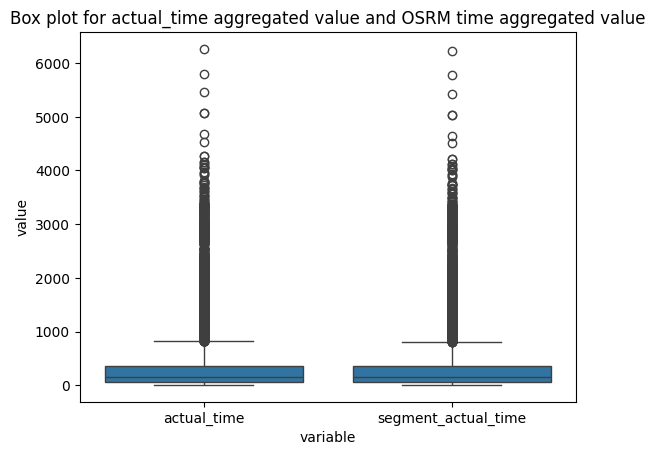

In [351]:
df_melted_2 = pd.melt(df_atav_out.reset_index(), id_vars = ["trip_uuid"], value_vars = ["actual_time", "segment_actual_time"])

sns.boxplot(x = "variable", y = "value", data = df_melted_2)

plt.title("Box plot for actual_time aggregated value and OSRM time aggregated value")
plt.show()

### osrm distance aggregated value and segment osrm distance aggregated value

In [352]:
df_odav = df.groupby(["trip_uuid", "destination_center"] )[["osrm_distance"]].last()
df_odav = df_odav.reset_index()
df_odav = df_odav.groupby("trip_uuid")["osrm_distance"].sum()
df_odav

,osrm_distance
trip_uuid,
trip-153671041653548748,991.3523
trip-153671042288605164,85.1110
trip-153671043369099517,2354.0665
trip-153671046011330457,19.6800
trip-153671052974046625,146.7918
...,...
trip-153861095625827784,73.4630
trip-153861104386292051,16.0882
trip-153861106442901555,58.9037


In [353]:
df_odav_seg = df.groupby(["trip_uuid"])["segment_osrm_distance"].sum()
df_odav = df_odav.reset_index()
df_odav = df_odav.merge(df_odav_seg, left_on='trip_uuid', right_on='trip_uuid')
df_odav = df_odav.reset_index()
df_odav

,index,trip_uuid,osrm_distance,segment_osrm_distance
0,0,trip-153671041653548748,991.3523,1320.4733
1,1,trip-153671042288605164,85.1110,84.1894
2,2,trip-153671043369099517,2354.0665,2545.2678
3,3,trip-153671046011330457,19.6800,19.8766
4,4,trip-153671052974046625,146.7918,146.7919
...,...,...,...,...
14782,14782,trip-153861095625827784,73.4630,64.8551
14783,14783,trip-153861104386292051,16.0882,16.0883
14784,14784,trip-153861106442901555,58.9037,104.8866
14785,14785,trip-153861115439069069,171.1103,223.5324


In [354]:
df_odav.describe()

,index,osrm_distance,segment_osrm_distance
count,14787.00000,14787.000000,14787.000000
mean,7393.00000,203.581339,222.705466
std,4268.78355,370.275648,416.846279
min,0.00000,9.072900,9.072900
25%,3696.50000,30.753000,32.578850
50%,7393.00000,65.269400,69.784200
75%,11089.50000,206.108050,216.560600
max,14786.00000,2840.081000,3523.632400


In [355]:
def df_odav_remove_outliers(odav, column):
    for col in columns:
      q1 = odav[col].quantile(0.25)
      q3 = odav[col].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      df_odav_clean = odav[(odav[col] >= lower_bound) & (odav[col] <= upper_bound)]

    return df_odav_clean

columns = ['osrm_distance', 'segment_osrm_distance']
df_odav_outremoved = df_odav_remove_outliers(df_odav, columns)
df_odav_outremoved

,index,trip_uuid,osrm_distance,segment_osrm_distance
1,1,trip-153671042288605164,85.1110,84.1894
3,3,trip-153671046011330457,19.6800,19.8766
4,4,trip-153671052974046625,146.7918,146.7919
5,5,trip-153671055416136166,28.0647,28.0647
6,6,trip-153671066201138152,12.0184,12.0184
...,...,...,...,...
14782,14782,trip-153861095625827784,73.4630,64.8551
14783,14783,trip-153861104386292051,16.0882,16.0883
14784,14784,trip-153861106442901555,58.9037,104.8866
14785,14785,trip-153861115439069069,171.1103,223.5324


In [356]:
df_odav_outremoved.describe()

,index,osrm_distance,segment_osrm_distance
count,13237.000000,13237.000000,13237.000000
mean,7412.832893,98.726110,105.296822
std,4281.788333,98.038247,103.374820
min,1.000000,9.072900,9.072900
25%,3710.000000,28.898500,30.030600
50%,7416.000000,51.159800,56.881500
75%,11141.000000,143.381600,152.836700
max,14786.000000,520.620700,492.394300


In [357]:
t_statistic, p_value = stats.ttest_rel(df_odav_outremoved["osrm_distance"], df_odav_outremoved["segment_osrm_distance"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of osrm_distance and segment_osrm_distance.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means of osrm_distance and segment_osrm_distance.")

t-statistic: -37.67652828312882
p-value: 3.4482233457971736e-295
Reject the null hypothesis. There is a significant difference between the means of osrm_distance and segment_osrm_distance.


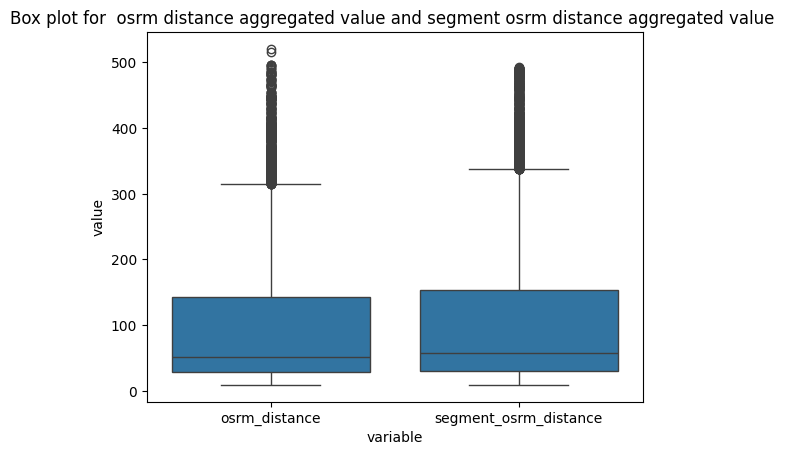

In [358]:
df_melted_3 = pd.melt(df_odav_outremoved.reset_index(), id_vars = ["trip_uuid"], value_vars = ["osrm_distance", "segment_osrm_distance"])

sns.boxplot(x = "variable", y = "value", data = df_melted_3)

plt.title("Box plot for  osrm distance aggregated value and segment osrm distance aggregated value ")
plt.show()

### hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

In [359]:
df_otav = df.groupby(["trip_uuid", "destination_center"] )[["osrm_time"]].last()
df_otav = df_otav.reset_index()
df_otav = df_otav.groupby("trip_uuid")["osrm_time"].sum()

In [360]:
df_otav_seg = df.groupby(["trip_uuid"])["segment_osrm_time"].sum()
df_otav = df_otav.reset_index()
df_otav = df_otav.merge(df_otav_seg, left_on='trip_uuid', right_on='trip_uuid')
df_otav = df_otav.reset_index()
df_otav

,index,trip_uuid,osrm_time,segment_osrm_time
0,0,trip-153671041653548748,717.0,1008.0
1,1,trip-153671042288605164,68.0,65.0
2,2,trip-153671043369099517,1740.0,1941.0
3,3,trip-153671046011330457,15.0,16.0
4,4,trip-153671052974046625,117.0,115.0
...,...,...,...,...
14782,14782,trip-153861095625827784,62.0,62.0
14783,14783,trip-153861104386292051,12.0,11.0
14784,14784,trip-153861106442901555,48.0,88.0
14785,14785,trip-153861115439069069,179.0,221.0


In [361]:
df_otav.describe()

,index,osrm_time,segment_osrm_time
count,14787.00000,14787.000000,14787.000000
mean,7393.00000,160.739839,180.511598
std,4268.78355,271.248764,314.679279
min,0.00000,6.000000,6.000000
25%,3696.50000,29.000000,30.000000
50%,7393.00000,60.000000,65.000000
75%,11089.50000,168.000000,184.000000
max,14786.00000,2032.000000,2564.000000


In [362]:
def df_otav_remove_outliers(otav, column):
    for col in columns:
      q1 = otav[col].quantile(0.25)
      q3 = otav[col].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      df_otav_clean = otav[(otav[col] >= lower_bound) & (otav[col] <= upper_bound)]

    return df_otav_clean

columns = ['osrm_time', 'segment_osrm_time']
df_otav_outremoved = df_otav_remove_outliers(df_otav, columns)
df_otav_outremoved

,index,trip_uuid,osrm_time,segment_osrm_time
1,1,trip-153671042288605164,68.0,65.0
3,3,trip-153671046011330457,15.0,16.0
4,4,trip-153671052974046625,117.0,115.0
5,5,trip-153671055416136166,23.0,23.0
6,6,trip-153671066201138152,13.0,13.0
...,...,...,...,...
14782,14782,trip-153861095625827784,62.0,62.0
14783,14783,trip-153861104386292051,12.0,11.0
14784,14784,trip-153861106442901555,48.0,88.0
14785,14785,trip-153861115439069069,179.0,221.0


In [363]:
df_otav_outremoved.describe()

,index,osrm_time,segment_osrm_time
count,13302.000000,13302.000000,13302.000000
mean,7407.037062,85.411141,93.289505
std,4279.762123,81.282817,88.541701
min,1.000000,6.000000,6.000000
25%,3708.250000,28.000000,28.000000
50%,7407.500000,52.000000,56.000000
75%,11130.750000,121.000000,138.750000
max,14786.000000,416.000000,415.000000


In [364]:
t_statistic, p_value = stats.ttest_rel(df_otav_outremoved["osrm_time"], df_otav_outremoved["segment_osrm_time"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of osrm_time and segment_osrm_time.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means of osrm_time and segment_osrm_time.")

t-statistic: -46.558388409772576
p-value: 0.0
Reject the null hypothesis. There is a significant difference between the means of osrm_time and segment_osrm_time.


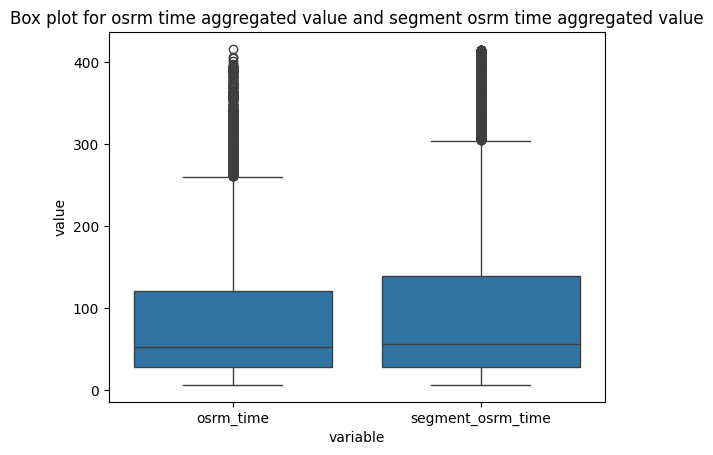

In [365]:
df_melted_4 = pd.melt(df_otav_outremoved.reset_index(), id_vars = ["trip_uuid"], value_vars = ["osrm_time", "segment_osrm_time"])

sns.boxplot(x = "variable", y = "value", data = df_melted_4)

plt.title("Box plot for osrm time aggregated value and segment osrm time aggregated value")
plt.show()

### Hot encoding of categorical variables

In [366]:
df_route_type = df.groupby("trip_uuid")["route_type"].first()
df_route_type.reset_index()
df_route_type

,route_type
trip_uuid,
trip-153671041653548748,FTL
trip-153671042288605164,Carting
trip-153671043369099517,FTL
trip-153671046011330457,Carting
trip-153671052974046625,FTL
...,...
trip-153861095625827784,Carting
trip-153861104386292051,Carting
trip-153861106442901555,Carting


In [367]:
df_route_type.value_counts()

,count
route_type,
Carting,8906
FTL,5881


In [368]:
df_combined_times

,trip_uuid,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,trip-153671041653548748,MADHYA PRADESH,2018-09-12,HARYANA,2018-09-13,2260.109800,1260.0,1562.0,1548.0,717.0,1008.0,991.3523,1320.47
1,trip-153671042288605164,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,181.611874,58.0,143.0,141.0,68.0,65.0,85.1110,84.19
2,trip-153671043369099517,KARNATAKA,2018-09-12,PUNJAB,2018-09-14,3934.362520,834.0,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.27
3,trip-153671046011330457,MAHARASHTRA,2018-09-12,MAHARASHTRA,2018-09-12,100.494935,100.0,59.0,59.0,15.0,16.0,19.6800,19.88
4,trip-153671052974046625,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,718.349042,485.0,341.0,340.0,117.0,115.0,146.7918,146.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,PUNJAB,2018-10-03,PUNJAB,2018-10-04,405.485842,105.0,83.0,82.0,62.0,62.0,73.4630,64.86
14783,trip-153861104386292051,HARYANA,2018-10-03,HARYANA,2018-10-04,60.590521,60.0,21.0,21.0,12.0,11.0,16.0882,16.09
14784,trip-153861106442901555,UTTAR PRADESH,2018-10-03,UTTAR PRADESH,2018-10-04,422.119867,248.0,282.0,281.0,48.0,88.0,58.9037,104.89
14785,trip-153861115439069069,TAMIL NADU,2018-10-03,TAMIL NADU,2018-10-04,348.512862,91.0,264.0,258.0,179.0,221.0,171.1103,223.53


In [369]:
df_combined_times['route_type'] = df_combined_times['route_type'].map({'FTL':0, 'Carting':1})
df_combined_times.head()

KeyError: 'route_type'

### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [ ]:
df_scaled = df_combined_times.copy()
df_scaled = df_scaled.drop(columns = ["trip_uuid", "source_name", "destination_name"])
df_scaled

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaled)
df_scaled_data = pd.DataFrame(scaled_data, columns = df_scaled.columns)
df_scaled_data.head()

In [ ]:
df_scaled_data.describe()